# Решение конкурса на kaggle.com
https://www.kaggle.com/c/advanced-dls-spring-2021/

# Метрика

In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

In [ ]:
data      = pd.read_csv('./train.csv')

15 случайных строк из датасета

In [ ]:
data.sample(15)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1151,11,55.60,580.8,Female,1,No,No,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
3910,34,20.80,635.9,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1520,58,24.50,1497.9,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),0
4071,6,49.25,255.6,Female,0,No,No,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,One year,Yes,Mailed check,0
4108,11,20.00,196.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
276,4,55.90,238.5,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0
1621,46,60.75,2893.4,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
4196,1,89.35,89.35,Female,0,No,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
2929,10,55.20,528.35,Female,0,Yes,Yes,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),1
4403,57,71.10,4140.1,Male,1,Yes,No,Yes,Yes,DSL,No,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),0


In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Из data.info() видно, что колонка TotalSpent имеет нечисловой тип. При последующей обработке данных оказалось, что в этой колонке присутствуют пустые значения в виде пробела.

Посмотрим на эти строки

In [ ]:
data.where(data['TotalSpent'] == ' ').dropna()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.0,25.75,,Male,0.0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
1707,0.0,73.35,,Female,0.0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0.0
2543,0.0,19.70,,Male,0.0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0.0
3078,0.0,80.85,,Female,0.0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0.0
3697,0.0,20.00,,Female,0.0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
4002,0.0,61.90,,Male,0.0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0.0
4326,0.0,25.35,,Male,0.0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
4551,0.0,52.55,,Female,0.0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0.0
4598,0.0,56.05,,Female,0.0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0.0


Как видно из таблицы TotalSpent пустое если и только если ClientPeriod нулевой.

In [ ]:
data.where(data['ClientPeriod'] == 0.0).dropna()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.0,25.75,,Male,0.0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
1707,0.0,73.35,,Female,0.0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0.0
2543,0.0,19.70,,Male,0.0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0.0
3078,0.0,80.85,,Female,0.0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0.0
3697,0.0,20.00,,Female,0.0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
4002,0.0,61.90,,Male,0.0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0.0
4326,0.0,25.35,,Male,0.0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
4551,0.0,52.55,,Female,0.0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0.0
4598,0.0,56.05,,Female,0.0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0.0


In [ ]:
data = data.replace(' ', 0.0)
data["TotalSpent"] = pd.to_numeric(data["TotalSpent"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных

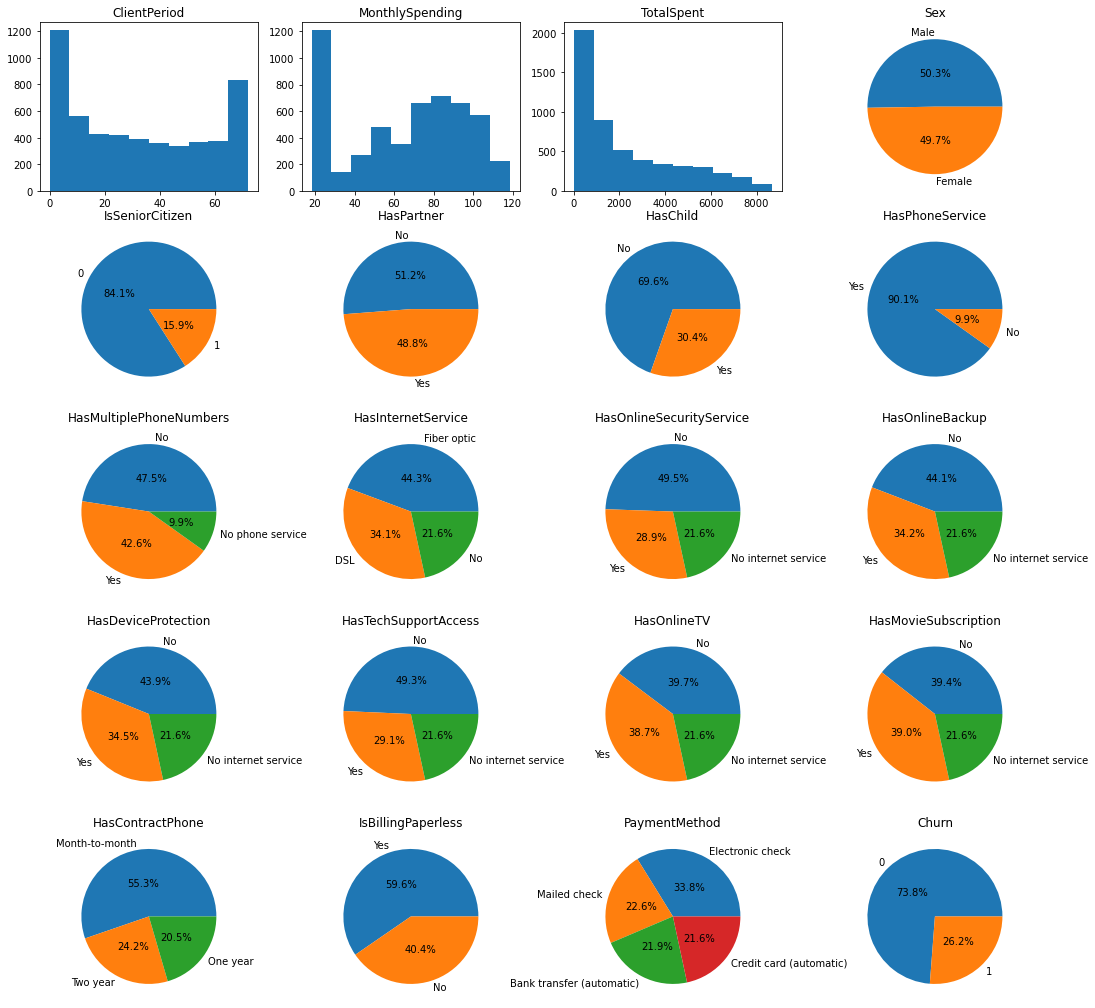

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=5, figsize = (18, 18))

for ax, col in zip(axs.flat[:3], num_cols):
    ax.hist(data[col])
    ax.set_title(col)

for ax, col in zip(axs.flat[3:], cat_cols+[target_col]):
    pie_data = data[col].value_counts()
    labels = pie_data.index
    ax.pie(pie_data, labels=labels, pctdistance=0.5, labeldistance=1.1, autopct='%1.1f%%')
    ax.set_title(col)

plt.plot()
pie_data = data[cat_cols[0]].value_counts()

Классы целевой переменной можно считать сбалансированными

Отрисуем корреляцию данных друг с другом

In [ ]:
mapping = {
    "Yes": 1,
    "No" : 0,
    "Male"  : 1,
    "Female": 0,
    "No phone service": 2,
    "No internet service": 2,
    "DSL": 1,
    "Fiber optic": 2,
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,
    "Mailed check": 0,
    "Electronic check": 1,
    "Bank transfer (automatic)": 2,
    "Credit card (automatic)": 3,
}

<AxesSubplot:>

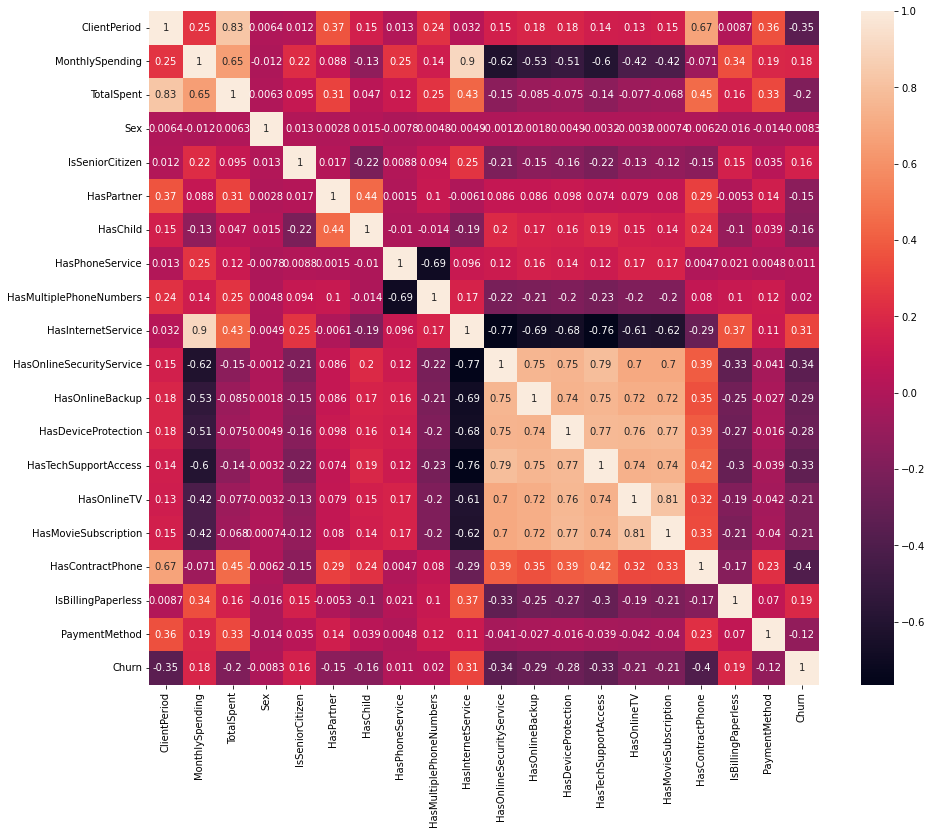

In [ ]:
labeled_data = data.replace(mapping)
corr = labeled_data.corr()
sns.heatmap(corr, annot=True, ax=plt.subplots(figsize=(15,12.4))[1])

## Применение линейных моделей

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

Разделение на обучающую и тестовую выборки

In [ ]:
X = labeled_data[num_cols+cat_cols]
y = labeled_data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

Для того, чтобы собрать преобразование данных и модель в один pipeline, запишем в ColumnTransformer какие колонки нужно преобразовать с помощью StandardScaler, а какие с помошью OneHotEncoder

In [ ]:
preprocessor = make_column_transformer((StandardScaler(), num_cols), (OneHotEncoder(), cat_cols))

Логистическая регрессия со значениями С = 0.001, 0.01, 0.1, 1, 10, 100

In [ ]:
reg_param_grid = {'logisticregression__C':np.logspace(-3, 2, 6)}

reg_pipe = GridSearchCV(estimator=make_pipeline(preprocessor, LogisticRegression()),
                        param_grid=reg_param_grid,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1,
                        verbose=10)
reg_pipe.fit(X_train, y_train)

Лучшие параметры и значения по итогу GridSearchCV

In [ ]:
print("best params:",reg_pipe.best_params_)
print("best score :",reg_pipe.best_score_)
reg_result = reg_pipe.best_estimator_.predict_proba(X_test)
roc_auc_score(y_test, reg_result[:,1])

best params: {'logisticregression__C': 10.0}
best score : 0.839697633844246


0.8646236295359765

Попробуем также использовать решающее дерево, случайный лес и алгоритм К ближайших соседей

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_param_grid = {"decisiontreeclassifier__max_depth":np.linspace(2,8,7).astype(int)}
tree_pipe = GridSearchCV(estimator=make_pipeline(preprocessor, DecisionTreeClassifier()),
                        param_grid=tree_param_grid,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1,
                        verbose=10)
tree_pipe.fit(X, y)
print("best params:",tree_pipe.best_params_)
print("best score :",tree_pipe.best_score_)
tree_result = tree_pipe.best_estimator_.predict_proba(X_test)
roc_auc_score(y_test, tree_result[:,1])

Fitting 5 folds for each of 7 candidates, totalling 35 fits
best params: {'decisiontreeclassifier__max_depth': 4}
best score : 0.827519910737378


0.8719547864812333

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_param_grid = {"randomforestclassifier__n_estimators": np.linspace(20,50,3).astype(int),
                     "randomforestclassifier__max_depth": np.linspace(3,6,4).astype(int)}
forest_pipe = GridSearchCV(estimator=make_pipeline(preprocessor, RandomForestClassifier()),
                           param_grid=forest_param_grid,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1,
                           verbose=10)
forest_pipe.fit(X_train, y_train)
print("best params:",forest_pipe.best_params_)
print("best score :",forest_pipe.best_score_)
forest_result = forest_pipe.best_estimator_.predict_proba(X_test)
roc_auc_score(y_test, forest_result[:,1])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best params: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__n_estimators': 50}
best score : 0.8376313930183266


0.8654940275130677

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_param_grid = {"kneighborsclassifier__n_neighbors":np.linspace(3,100,10).astype(int)}
knn_pipe = GridSearchCV(estimator=make_pipeline(preprocessor, KNeighborsClassifier()),
                        param_grid=knn_param_grid,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1,
                        verbose=10)
knn_pipe.fit(X, y)
print("best params:",knn_pipe.best_params_)
print("best score :",knn_pipe.best_score_)
knn_result = knn_pipe.best_estimator_.predict_proba(X_test)
roc_auc_score(y_test, knn_result[:,1])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best params: {'kneighborsclassifier__n_neighbors': 78}
best score : 0.8359581372818369


0.8678905704527015

При кросс-валидации лучшее качество получилось у линейной регрессии 0.840. Однако на тестовой выборке лучшее качество дало решающее дерево: 0.872

## Применение градиентного бустинга

In [ ]:
import catboost

In [ ]:
X_boost = data[num_cols+cat_cols]
y_boost = data[target_col]
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_boost, y_boost, test_size=0.2, random_state=36)

In [ ]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model.fit(Xb_train, yb_train)
boost_result = boosting_model.predict_proba(Xb_test)[:,1]

Learning rate set to 0.019062
0:	learn: 0.6808106	total: 52.1ms	remaining: 52.1s
1:	learn: 0.6699385	total: 55.5ms	remaining: 27.7s
2:	learn: 0.6581628	total: 59.2ms	remaining: 19.7s
3:	learn: 0.6474253	total: 62ms	remaining: 15.4s
4:	learn: 0.6373051	total: 65.6ms	remaining: 13.1s
5:	learn: 0.6275444	total: 68.8ms	remaining: 11.4s
6:	learn: 0.6181325	total: 71.6ms	remaining: 10.2s
7:	learn: 0.6102365	total: 73.4ms	remaining: 9.1s
8:	learn: 0.6014625	total: 76ms	remaining: 8.37s
9:	learn: 0.5939780	total: 79ms	remaining: 7.82s
10:	learn: 0.5863800	total: 82.2ms	remaining: 7.39s
11:	learn: 0.5796961	total: 84.4ms	remaining: 6.95s
12:	learn: 0.5736698	total: 86.1ms	remaining: 6.53s
13:	learn: 0.5670449	total: 89ms	remaining: 6.27s
14:	learn: 0.5604163	total: 91.9ms	remaining: 6.03s
15:	learn: 0.5542546	total: 94.8ms	remaining: 5.83s
16:	learn: 0.5481836	total: 98.6ms	remaining: 5.7s
17:	learn: 0.5425629	total: 101ms	remaining: 5.53s
18:	learn: 0.5382551	total: 103ms	remaining: 5.33s
19:	

189:	learn: 0.3992114	total: 594ms	remaining: 2.53s
190:	learn: 0.3991845	total: 597ms	remaining: 2.53s
191:	learn: 0.3991153	total: 600ms	remaining: 2.52s
192:	learn: 0.3989462	total: 603ms	remaining: 2.52s
193:	learn: 0.3988082	total: 606ms	remaining: 2.52s
194:	learn: 0.3985780	total: 610ms	remaining: 2.52s
195:	learn: 0.3984232	total: 613ms	remaining: 2.52s
196:	learn: 0.3983462	total: 616ms	remaining: 2.51s
197:	learn: 0.3981906	total: 619ms	remaining: 2.51s
198:	learn: 0.3980343	total: 622ms	remaining: 2.5s
199:	learn: 0.3978203	total: 626ms	remaining: 2.5s
200:	learn: 0.3976423	total: 629ms	remaining: 2.5s
201:	learn: 0.3975193	total: 632ms	remaining: 2.5s
202:	learn: 0.3974323	total: 635ms	remaining: 2.49s
203:	learn: 0.3972699	total: 638ms	remaining: 2.49s
204:	learn: 0.3970678	total: 641ms	remaining: 2.49s
205:	learn: 0.3970480	total: 643ms	remaining: 2.48s
206:	learn: 0.3969437	total: 646ms	remaining: 2.48s
207:	learn: 0.3968995	total: 649ms	remaining: 2.47s
208:	learn: 0.39

392:	learn: 0.3806318	total: 1.19s	remaining: 1.83s
393:	learn: 0.3806277	total: 1.19s	remaining: 1.83s
394:	learn: 0.3804729	total: 1.19s	remaining: 1.83s
395:	learn: 0.3804716	total: 1.2s	remaining: 1.82s
396:	learn: 0.3803770	total: 1.2s	remaining: 1.82s
397:	learn: 0.3801503	total: 1.2s	remaining: 1.82s
398:	learn: 0.3801503	total: 1.2s	remaining: 1.81s
399:	learn: 0.3801294	total: 1.21s	remaining: 1.81s
400:	learn: 0.3799319	total: 1.21s	remaining: 1.81s
401:	learn: 0.3799317	total: 1.21s	remaining: 1.8s
402:	learn: 0.3799010	total: 1.21s	remaining: 1.8s
403:	learn: 0.3798183	total: 1.22s	remaining: 1.8s
404:	learn: 0.3797697	total: 1.22s	remaining: 1.79s
405:	learn: 0.3797228	total: 1.22s	remaining: 1.79s
406:	learn: 0.3795347	total: 1.23s	remaining: 1.79s
407:	learn: 0.3794625	total: 1.23s	remaining: 1.79s
408:	learn: 0.3794140	total: 1.23s	remaining: 1.78s
409:	learn: 0.3793117	total: 1.24s	remaining: 1.78s
410:	learn: 0.3791318	total: 1.24s	remaining: 1.78s
411:	learn: 0.37892

574:	learn: 0.3622840	total: 1.78s	remaining: 1.32s
575:	learn: 0.3621972	total: 1.78s	remaining: 1.31s
576:	learn: 0.3621002	total: 1.79s	remaining: 1.31s
577:	learn: 0.3620009	total: 1.79s	remaining: 1.31s
578:	learn: 0.3618177	total: 1.79s	remaining: 1.3s
579:	learn: 0.3617442	total: 1.8s	remaining: 1.3s
580:	learn: 0.3616946	total: 1.8s	remaining: 1.3s
581:	learn: 0.3615254	total: 1.8s	remaining: 1.3s
582:	learn: 0.3613948	total: 1.81s	remaining: 1.29s
583:	learn: 0.3611987	total: 1.81s	remaining: 1.29s
584:	learn: 0.3610895	total: 1.81s	remaining: 1.29s
585:	learn: 0.3609127	total: 1.82s	remaining: 1.28s
586:	learn: 0.3607957	total: 1.82s	remaining: 1.28s
587:	learn: 0.3606164	total: 1.82s	remaining: 1.28s
588:	learn: 0.3605225	total: 1.83s	remaining: 1.28s
589:	learn: 0.3604525	total: 1.83s	remaining: 1.27s
590:	learn: 0.3603859	total: 1.83s	remaining: 1.27s
591:	learn: 0.3603540	total: 1.84s	remaining: 1.27s
592:	learn: 0.3601590	total: 1.84s	remaining: 1.26s
593:	learn: 0.36003

751:	learn: 0.3454962	total: 2.38s	remaining: 785ms
752:	learn: 0.3454437	total: 2.38s	remaining: 782ms
753:	learn: 0.3452598	total: 2.39s	remaining: 779ms
754:	learn: 0.3452202	total: 2.39s	remaining: 776ms
755:	learn: 0.3451319	total: 2.4s	remaining: 773ms
756:	learn: 0.3449630	total: 2.4s	remaining: 770ms
757:	learn: 0.3448767	total: 2.4s	remaining: 767ms
758:	learn: 0.3448057	total: 2.4s	remaining: 764ms
759:	learn: 0.3446913	total: 2.41s	remaining: 761ms
760:	learn: 0.3446574	total: 2.41s	remaining: 757ms
761:	learn: 0.3446449	total: 2.41s	remaining: 754ms
762:	learn: 0.3445895	total: 2.42s	remaining: 751ms
763:	learn: 0.3445074	total: 2.42s	remaining: 748ms
764:	learn: 0.3444315	total: 2.42s	remaining: 745ms
765:	learn: 0.3443293	total: 2.43s	remaining: 742ms
766:	learn: 0.3441758	total: 2.43s	remaining: 739ms
767:	learn: 0.3440935	total: 2.44s	remaining: 736ms
768:	learn: 0.3439144	total: 2.44s	remaining: 733ms
769:	learn: 0.3437671	total: 2.44s	remaining: 730ms
770:	learn: 0.34

927:	learn: 0.3318438	total: 2.97s	remaining: 231ms
928:	learn: 0.3317722	total: 2.98s	remaining: 227ms
929:	learn: 0.3317170	total: 2.98s	remaining: 224ms
930:	learn: 0.3316291	total: 2.98s	remaining: 221ms
931:	learn: 0.3315658	total: 2.99s	remaining: 218ms
932:	learn: 0.3315175	total: 2.99s	remaining: 215ms
933:	learn: 0.3314186	total: 2.99s	remaining: 211ms
934:	learn: 0.3313440	total: 3s	remaining: 208ms
935:	learn: 0.3313173	total: 3s	remaining: 205ms
936:	learn: 0.3312196	total: 3s	remaining: 202ms
937:	learn: 0.3311952	total: 3.01s	remaining: 199ms
938:	learn: 0.3311694	total: 3.01s	remaining: 196ms
939:	learn: 0.3311185	total: 3.01s	remaining: 192ms
940:	learn: 0.3310264	total: 3.02s	remaining: 189ms
941:	learn: 0.3309990	total: 3.02s	remaining: 186ms
942:	learn: 0.3309485	total: 3.02s	remaining: 183ms
943:	learn: 0.3307739	total: 3.03s	remaining: 180ms
944:	learn: 0.3306897	total: 3.03s	remaining: 176ms
945:	learn: 0.3306116	total: 3.03s	remaining: 173ms
946:	learn: 0.3306020

In [ ]:
roc_auc_score(yb_test,boost_result)

0.8658077481931576

In [ ]:
boosting_model_mod = catboost.CatBoostClassifier(cat_features=cat_cols,
                                                 n_estimators=2000,
                                                 learning_rate=0.005,
                                                 eval_metric='AUC')
boosting_model_mod.fit(Xb_train, yb_train, plot=True)
boost_mod_result = boosting_model_mod.predict_proba(Xb_test)[:,1]

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 3.61ms	remaining: 7.21s
1:	total: 6.58ms	remaining: 6.57s
2:	total: 9.84ms	remaining: 6.55s
3:	total: 13ms	remaining: 6.46s
4:	total: 16.3ms	remaining: 6.5s
5:	total: 19ms	remaining: 6.31s
6:	total: 22.2ms	remaining: 6.33s
7:	total: 23.8ms	remaining: 5.91s
8:	total: 26.9ms	remaining: 5.94s
9:	total: 30.4ms	remaining: 6.05s
10:	total: 31.8ms	remaining: 5.76s
11:	total: 35.1ms	remaining: 5.81s
12:	total: 38.2ms	remaining: 5.83s
13:	total: 40.5ms	remaining: 5.75s
14:	total: 43.4ms	remaining: 5.74s
15:	total: 46.4ms	remaining: 5.75s
16:	total: 49.4ms	remaining: 5.76s
17:	total: 51.9ms	remaining: 5.72s
18:	total: 55.7ms	remaining: 5.81s
19:	total: 59.1ms	remaining: 5.85s
20:	total: 61.8ms	remaining: 5.83s
21:	total: 64.7ms	remaining: 5.82s
22:	total: 66.9ms	remaining: 5.75s
23:	total: 69.3ms	remaining: 5.71s
24:	total: 72.2ms	remaining: 5.7s
25:	total: 74.9ms	remaining: 5.69s
26:	total: 77.7ms	remaining: 5.68s
27:	total: 79.8ms	remaining: 5.62s
28:	total: 83ms	remaining: 5.64s
29:

256:	total: 792ms	remaining: 5.37s
257:	total: 795ms	remaining: 5.37s
258:	total: 798ms	remaining: 5.36s
259:	total: 801ms	remaining: 5.36s
260:	total: 804ms	remaining: 5.36s
261:	total: 808ms	remaining: 5.36s
262:	total: 812ms	remaining: 5.36s
263:	total: 816ms	remaining: 5.36s
264:	total: 819ms	remaining: 5.36s
265:	total: 822ms	remaining: 5.36s
266:	total: 825ms	remaining: 5.36s
267:	total: 828ms	remaining: 5.35s
268:	total: 832ms	remaining: 5.36s
269:	total: 836ms	remaining: 5.36s
270:	total: 840ms	remaining: 5.36s
271:	total: 843ms	remaining: 5.36s
272:	total: 847ms	remaining: 5.36s
273:	total: 850ms	remaining: 5.35s
274:	total: 854ms	remaining: 5.36s
275:	total: 857ms	remaining: 5.36s
276:	total: 860ms	remaining: 5.35s
277:	total: 864ms	remaining: 5.35s
278:	total: 869ms	remaining: 5.36s
279:	total: 873ms	remaining: 5.36s
280:	total: 876ms	remaining: 5.36s
281:	total: 879ms	remaining: 5.36s
282:	total: 883ms	remaining: 5.35s
283:	total: 887ms	remaining: 5.36s
284:	total: 891ms	re

504:	total: 1.58s	remaining: 4.67s
505:	total: 1.58s	remaining: 4.67s
506:	total: 1.58s	remaining: 4.66s
507:	total: 1.59s	remaining: 4.66s
508:	total: 1.59s	remaining: 4.66s
509:	total: 1.59s	remaining: 4.65s
510:	total: 1.59s	remaining: 4.64s
511:	total: 1.6s	remaining: 4.64s
512:	total: 1.6s	remaining: 4.64s
513:	total: 1.6s	remaining: 4.63s
514:	total: 1.61s	remaining: 4.63s
515:	total: 1.61s	remaining: 4.63s
516:	total: 1.61s	remaining: 4.63s
517:	total: 1.62s	remaining: 4.63s
518:	total: 1.62s	remaining: 4.63s
519:	total: 1.63s	remaining: 4.63s
520:	total: 1.63s	remaining: 4.63s
521:	total: 1.63s	remaining: 4.62s
522:	total: 1.63s	remaining: 4.61s
523:	total: 1.64s	remaining: 4.61s
524:	total: 1.64s	remaining: 4.61s
525:	total: 1.65s	remaining: 4.62s
526:	total: 1.65s	remaining: 4.61s
527:	total: 1.65s	remaining: 4.61s
528:	total: 1.66s	remaining: 4.61s
529:	total: 1.66s	remaining: 4.61s
530:	total: 1.66s	remaining: 4.6s
531:	total: 1.67s	remaining: 4.6s
532:	total: 1.67s	remaini

761:	total: 2.37s	remaining: 3.85s
762:	total: 2.37s	remaining: 3.85s
763:	total: 2.38s	remaining: 3.84s
764:	total: 2.38s	remaining: 3.84s
765:	total: 2.38s	remaining: 3.84s
766:	total: 2.38s	remaining: 3.83s
767:	total: 2.39s	remaining: 3.83s
768:	total: 2.39s	remaining: 3.83s
769:	total: 2.4s	remaining: 3.83s
770:	total: 2.4s	remaining: 3.82s
771:	total: 2.4s	remaining: 3.82s
772:	total: 2.4s	remaining: 3.81s
773:	total: 2.4s	remaining: 3.81s
774:	total: 2.41s	remaining: 3.81s
775:	total: 2.41s	remaining: 3.8s
776:	total: 2.42s	remaining: 3.8s
777:	total: 2.42s	remaining: 3.8s
778:	total: 2.42s	remaining: 3.8s
779:	total: 2.42s	remaining: 3.79s
780:	total: 2.43s	remaining: 3.79s
781:	total: 2.43s	remaining: 3.79s
782:	total: 2.43s	remaining: 3.78s
783:	total: 2.43s	remaining: 3.77s
784:	total: 2.44s	remaining: 3.77s
785:	total: 2.44s	remaining: 3.77s
786:	total: 2.44s	remaining: 3.76s
787:	total: 2.44s	remaining: 3.76s
788:	total: 2.45s	remaining: 3.76s
789:	total: 2.45s	remaining: 

1006:	total: 3.16s	remaining: 3.11s
1007:	total: 3.16s	remaining: 3.11s
1008:	total: 3.16s	remaining: 3.11s
1009:	total: 3.17s	remaining: 3.1s
1010:	total: 3.17s	remaining: 3.1s
1011:	total: 3.17s	remaining: 3.1s
1012:	total: 3.18s	remaining: 3.1s
1013:	total: 3.18s	remaining: 3.09s
1014:	total: 3.18s	remaining: 3.09s
1015:	total: 3.19s	remaining: 3.09s
1016:	total: 3.19s	remaining: 3.08s
1017:	total: 3.19s	remaining: 3.08s
1018:	total: 3.2s	remaining: 3.08s
1019:	total: 3.2s	remaining: 3.08s
1020:	total: 3.2s	remaining: 3.07s
1021:	total: 3.21s	remaining: 3.07s
1022:	total: 3.21s	remaining: 3.06s
1023:	total: 3.21s	remaining: 3.06s
1024:	total: 3.21s	remaining: 3.06s
1025:	total: 3.22s	remaining: 3.05s
1026:	total: 3.22s	remaining: 3.05s
1027:	total: 3.22s	remaining: 3.05s
1028:	total: 3.23s	remaining: 3.04s
1029:	total: 3.23s	remaining: 3.04s
1030:	total: 3.23s	remaining: 3.04s
1031:	total: 3.23s	remaining: 3.03s
1032:	total: 3.24s	remaining: 3.03s
1033:	total: 3.24s	remaining: 3.03s

1261:	total: 3.94s	remaining: 2.31s
1262:	total: 3.95s	remaining: 2.3s
1263:	total: 3.95s	remaining: 2.3s
1264:	total: 3.95s	remaining: 2.3s
1265:	total: 3.96s	remaining: 2.29s
1266:	total: 3.96s	remaining: 2.29s
1267:	total: 3.96s	remaining: 2.29s
1268:	total: 3.96s	remaining: 2.28s
1269:	total: 3.97s	remaining: 2.28s
1270:	total: 3.97s	remaining: 2.28s
1271:	total: 3.97s	remaining: 2.27s
1272:	total: 3.97s	remaining: 2.27s
1273:	total: 3.98s	remaining: 2.27s
1274:	total: 3.98s	remaining: 2.26s
1275:	total: 3.98s	remaining: 2.26s
1276:	total: 3.98s	remaining: 2.25s
1277:	total: 3.98s	remaining: 2.25s
1278:	total: 3.99s	remaining: 2.25s
1279:	total: 3.99s	remaining: 2.24s
1280:	total: 3.99s	remaining: 2.24s
1281:	total: 4s	remaining: 2.24s
1282:	total: 4s	remaining: 2.23s
1283:	total: 4s	remaining: 2.23s
1284:	total: 4s	remaining: 2.23s
1285:	total: 4.01s	remaining: 2.23s
1286:	total: 4.01s	remaining: 2.22s
1287:	total: 4.01s	remaining: 2.22s
1288:	total: 4.02s	remaining: 2.21s
1289:	t

1519:	total: 4.73s	remaining: 1.49s
1520:	total: 4.74s	remaining: 1.49s
1521:	total: 4.74s	remaining: 1.49s
1522:	total: 4.74s	remaining: 1.49s
1523:	total: 4.75s	remaining: 1.48s
1524:	total: 4.75s	remaining: 1.48s
1525:	total: 4.75s	remaining: 1.48s
1526:	total: 4.76s	remaining: 1.47s
1527:	total: 4.76s	remaining: 1.47s
1528:	total: 4.76s	remaining: 1.47s
1529:	total: 4.77s	remaining: 1.46s
1530:	total: 4.77s	remaining: 1.46s
1531:	total: 4.77s	remaining: 1.46s
1532:	total: 4.78s	remaining: 1.46s
1533:	total: 4.78s	remaining: 1.45s
1534:	total: 4.78s	remaining: 1.45s
1535:	total: 4.79s	remaining: 1.45s
1536:	total: 4.79s	remaining: 1.44s
1537:	total: 4.79s	remaining: 1.44s
1538:	total: 4.8s	remaining: 1.44s
1539:	total: 4.8s	remaining: 1.43s
1540:	total: 4.8s	remaining: 1.43s
1541:	total: 4.81s	remaining: 1.43s
1542:	total: 4.81s	remaining: 1.42s
1543:	total: 4.81s	remaining: 1.42s
1544:	total: 4.82s	remaining: 1.42s
1545:	total: 4.82s	remaining: 1.42s
1546:	total: 4.82s	remaining: 1

1800:	total: 5.72s	remaining: 632ms
1801:	total: 5.73s	remaining: 629ms
1802:	total: 5.73s	remaining: 626ms
1803:	total: 5.74s	remaining: 623ms
1804:	total: 5.74s	remaining: 620ms
1805:	total: 5.74s	remaining: 617ms
1806:	total: 5.75s	remaining: 614ms
1807:	total: 5.75s	remaining: 611ms
1808:	total: 5.75s	remaining: 608ms
1809:	total: 5.76s	remaining: 604ms
1810:	total: 5.76s	remaining: 601ms
1811:	total: 5.77s	remaining: 598ms
1812:	total: 5.77s	remaining: 595ms
1813:	total: 5.77s	remaining: 592ms
1814:	total: 5.78s	remaining: 589ms
1815:	total: 5.78s	remaining: 586ms
1816:	total: 5.78s	remaining: 583ms
1817:	total: 5.79s	remaining: 579ms
1818:	total: 5.79s	remaining: 576ms
1819:	total: 5.79s	remaining: 573ms
1820:	total: 5.8s	remaining: 570ms
1821:	total: 5.8s	remaining: 567ms
1822:	total: 5.8s	remaining: 563ms
1823:	total: 5.8s	remaining: 560ms
1824:	total: 5.81s	remaining: 557ms
1825:	total: 5.81s	remaining: 554ms
1826:	total: 5.82s	remaining: 551ms
1827:	total: 5.82s	remaining: 54

In [ ]:
roc_auc_score(yb_test,boost_mod_result)

0.8709405015756798

In [ ]:
boosting_model_sem = catboost.CatBoostClassifier(n_estimators=500, silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_model_sem.grid_search({'l2_leaf_reg': np.linspace(0, 1, 10)},
                           Xb_train,
                           yb_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8250591835
bestIteration = 388

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8250592	best: 0.8250592 (0)	total: 2.71s	remaining: 24.4s

bestTest = 0.8259763543
bestIteration = 239

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8259764	best: 0.8259764 (1)	total: 5.5s	remaining: 22s

bestTest = 0.8279422148
bestIteration = 358

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8279422	best: 0.8279422 (2)	total: 8.16s	remaining: 19s

bestTest = 0.827506126
bestIteration = 386

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8275061	best: 0.8279422 (2)	total: 10.9s	remaining: 16.4s

bestTest 

{'params': {'l2_leaf_reg': 0.4444444444444444},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
   

In [ ]:
boost_sem_result = boosting_model_sem.predict_proba(Xb_test)[:,1]
roc_auc_score(yb_test,boost_sem_result)

0.8639513709357841

Лучшее качество на тестовой выборке: 0.871

n_estimators=2000

learning_rate=0.005

# Предсказания

In [ ]:
best_model = boosting_model_mod

In [ ]:
submission = pd.read_csv('./submission.csv')
submission_data = pd.read_csv('./test.csv')
submission_data = submission_data.replace(' ', 0.0)
submission_data["TotalSpent"] = pd.to_numeric(submission_data["TotalSpent"])

labeled_data = data.replace(mapping)

X_submission = submission_data[num_cols+cat_cols]

submission['Churn'] = best_model.predict_proba(X_submission)[:,1]
submission.to_csv('./my_submission.csv', index=False)